In [2]:
import os
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt
import json
import random
from tqdm import tqdm
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scipy.ndimage.measurements import label

In [74]:
class VeloEval(object):
    @staticmethod
    def load_json_file(file_list):
        data_list = []
        for file_name in file_list:
            with open(file_name) as f:
                raw_data = json.load(f)
            data_list.append(raw_data)
        return data_list

    @staticmethod
    def transform_annotation(raw_data_list):
        anno_list = []
        for raw_data in raw_data_list:
            data = []
            for instance in raw_data:
                instance["bbox"] = np.array([[instance["bbox"]["top"],
                                              instance["bbox"]["left"],
                                              instance["bbox"]["bottom"],
                                              instance["bbox"]["right"]]])
                data.append(instance)
            anno_list.append(data)
        return anno_list

    @staticmethod
    def load_annotation(file_list):
        raw_data_list = VeloEval.load_json_file(file_list)
        anno_list = VeloEval.transform_annotation(raw_data_list)
        print ("Finished loading {0:d} annotations.".format(len(anno_list)))
        return anno_list

In [75]:
train_path = "./benchmark_velocity_train/clips"
folder_path = list(map(int, os.listdir(train_path)))
folder_path.sort()
annotations = [os.path.join(train_path, str(x), 'annotation.json') for x in folder_path]
gt = VeloEval.load_annotation(annotations)

Finished loading 1074 annotations.


In [3]:
supp_path = "./benchmark_velocity_supp/"
with open(os.path.join(supp_path, 'annotation.json'), 'r') as f:
    supp_gt = json.load(f)
f.close

<function TextIOWrapper.close>

In [5]:
case = supp_gt[0]
img_bgr = cv2.imread(os.path.join(supp_path, case['file_name']))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

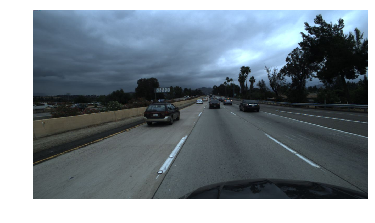

In [7]:
plt.axis('off')
plt.imshow(img_rgb)

In [18]:
roi = case['bbox'][4]
top = int(roi['top'])
right = int(roi['right'])
left = int(roi['left'])
bottom = int(roi['bottom'])
car_img_rgb = img_rgb[top:bottom, left:right]


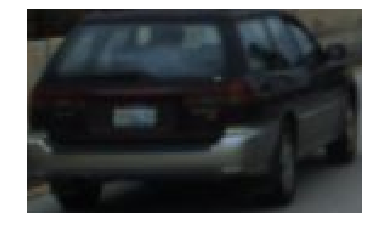

In [19]:
plt.axis('off')
plt.imshow(car_img_rgb)

In [63]:
resized_img = cv2.resize(car_img_rgb, (64,64))
hog_feature, hog_img= hog(image=resized_img[:,:,1], orientations=9, pixels_per_cell=(8,8), cells_per_block=(1,1), visualize=True, feature_vector=True)

In [64]:
hog_img.shape

(64, 64)

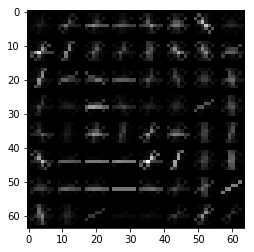

In [65]:
plt.imshow(hog_img, "gray")

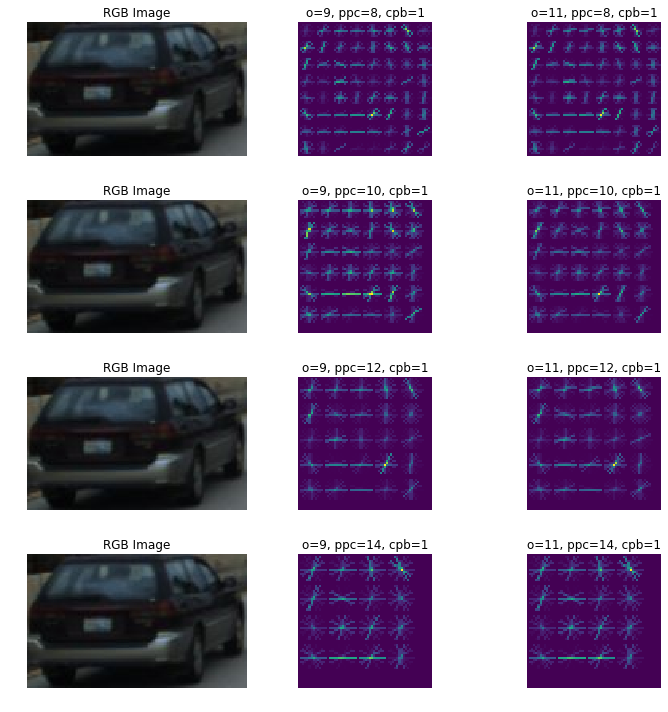

In [67]:
resized_img = cv2.resize(car_img_rgb, (64,64))
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(car_img_rgb)
ax[0].set_title('RGB Image')
hog_feature, hog_img= hog(image=resized_img, orientations=9, pixels_per_cell=(8,8), cells_per_block=(1,1), visualize=True, feature_vector=True)
ax[1].imshow(hog_img)
ax[1].set_title('o=9, ppc=8, cpb=1')
hog_feature, hog_img= hog(image=resized_img, orientations=11, pixels_per_cell=(8,8), cells_per_block=(1,1), visualize=True, feature_vector=True)
ax[2].imshow(hog_img)
ax[2].set_title('o=11, ppc=8, cpb=1')
ax[3].imshow(car_img_rgb)
ax[3].set_title('RGB Image')
hog_feature, hog_img= hog(image=resized_img, orientations=9, pixels_per_cell=(10,10), cells_per_block=(1,1), visualize=True, feature_vector=True)
ax[4].imshow(hog_img)
ax[4].set_title('o=9, ppc=10, cpb=1')
hog_feature, hog_img= hog(image=resized_img, orientations=11, pixels_per_cell=(10,10), cells_per_block=(1,1), visualize=True, feature_vector=True)
ax[5].imshow(hog_img)
ax[5].set_title('o=11, ppc=10, cpb=1')
ax[6].imshow(car_img_rgb)
ax[6].set_title('RGB Image')
hog_feature, hog_img= hog(image=resized_img, orientations=9, pixels_per_cell=(12,12), cells_per_block=(1,1), visualize=True, feature_vector=True)
ax[7].imshow(hog_img)
ax[7].set_title('o=9, ppc=12, cpb=1')
hog_feature, hog_img= hog(image=resized_img, orientations=11, pixels_per_cell=(12,12), cells_per_block=(1,1), visualize=True, feature_vector=True)
ax[8].imshow(hog_img)
ax[8].set_title('o=11, ppc=12, cpb=1')
ax[9].imshow(car_img_rgb)
ax[9].set_title('RGB Image')
hog_feature, hog_img= hog(image=resized_img, orientations=9, pixels_per_cell=(14,14), cells_per_block=(1,1), visualize=True, feature_vector=True)                         
ax[10].imshow(hog_img)
ax[10].set_title('o=9, ppc=14, cpb=1')
hog_feature, hog_img= hog(image=resized_img, orientations=9, pixels_per_cell=(14,14), cells_per_block=(1,1), visualize=True, feature_vector=True)
ax[11].imshow(hog_img)
ax[11].set_title('o=11, ppc=14, cpb=1')



for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()


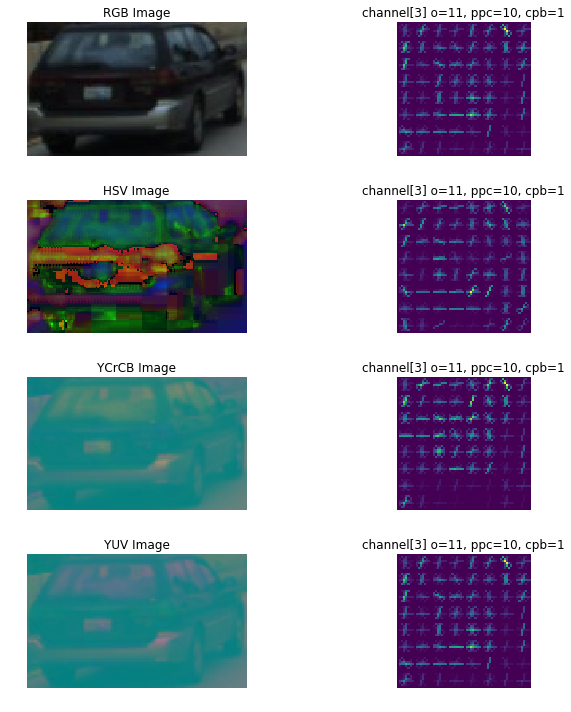

In [72]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(car_img_rgb)
ax[0].set_title('RGB Image')
hog_feature, hog_img= hog(image=resized_img[:,:,2], orientations=11, pixels_per_cell=(8,8), cells_per_block=(1,1), visualize=True, feature_vector=True)
ax[1].imshow(hog_img)
ax[1].set_title('channel[3] o=11, ppc=10, cpb=1')
car_img_hsv = cv2.cvtColor(car_img_rgb, cv2.COLOR_BGR2HSV)
ax[2].imshow(car_img_hsv)
ax[2].set_title('HSV Image')
resized_img = cv2.resize(car_img_hsv, (64,64))
hog_feature, hog_img= hog(image=resized_img[:,:,2], orientations=11, pixels_per_cell=(8,8), cells_per_block=(1,1), visualize=True, feature_vector=True)
ax[3].imshow(hog_img)
ax[3].set_title('channel[3] o=11, ppc=10, cpb=1')
car_img_yCrCB = cv2.cvtColor(car_img_rgb, cv2.COLOR_BGR2YCrCb)
ax[4].imshow(car_img_yCrCB)
ax[4].set_title('YCrCB Image')
resized_img = cv2.resize(car_img_yCrCB, (64,64))
hog_feature, hog_img= hog(image=resized_img[:,:,2], orientations=11, pixels_per_cell=(8,8), cells_per_block=(1,1), visualize=True, feature_vector=True)
ax[5].imshow(hog_img)
ax[5].set_title('channel[3] o=11, ppc=10, cpb=1')
car_img_yuv = cv2.cvtColor(car_img_rgb, cv2.COLOR_BGR2YUV)
ax[6].imshow(car_img_yuv)
ax[6].set_title('YUV Image')
resized_img = cv2.resize(car_img_yuv, (64,64))
hog_feature, hog_img= hog(image=resized_img[:,:,2], orientations=11, pixels_per_cell=(8,8), cells_per_block=(1,1), visualize=True, feature_vector=True)                         
ax[7].imshow(hog_img)
ax[7].set_title('channel[3] o=11, ppc=10, cpb=1')


for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [73]:
def color_histogram(img, nbins=32, bins_range=(0, 256)):
    """
    Returns the histograms of the color image across all channels, as a concatenanted feature vector
    """
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    # Concatenate the histograms into a single feature vector and return it
    return np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))